In [154]:
import pandas as pd
import pickle
import seaborn as sns



In [230]:
filename = 'fake_job_postings.csv'
job_df = pd.read_csv(filename)

In [156]:
job_df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [178]:
job_df.department = job_df.department.replace(to_replace='[A-Za-z]+,|,|^[\s]', value='', regex=True)
job_df.department = job_df.department.replace(to_replace='\d+|(\s\s)', value='', regex=True)
job_df.department = job_df.department.str.lower()

In [232]:
job_df.location = job_df.location.str.lower()

f_df = job_df[job_df.fraudulent == True]
r_df = job_df[job_df.fraudulent == False]

pd.options.display.max_seq_items = 4000
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

def feature_table(column_name):
    r_func_df = pd.DataFrame(r_df[column_name].value_counts())
    r_func_df['%_real_jobs'] = (r_func_df[column_name] / len(r_df)) * 100
    r_func_df = r_func_df.drop(column_name, axis= 1)

    f_func_df = pd.DataFrame(f_df[column_name].value_counts())
    f_func_df['%_fake_jobs'] = (f_func_df[column_name] / len(f_df)) * 100
    f_func_df = f_func_df.drop(column_name, axis= 1)

    job_func_df = r_func_df.join(f_func_df)
    job_func_df['diff'] = abs(r_func_df['%_real_jobs'] - f_func_df['%_fake_jobs'] )
    print(job_func_df.sort_values(by= 'diff', ascending= False))
    

def feature_extraction(column, normalize):

    real = round(((r_df[column].sum() / len(r_df)) * 100), 2)
    fake = round(((f_df[column].sum() / len(f_df)) * 100), 2)
    

    
    print(f'Feature : {column}  real jobs percentage: {real}  fake jobs percentage: {fake}')
    x =  pd.DataFrame({"real_jobs": real, "fake_jobs" : fake}, index = [0])
    sns.barplot(data = x, label = column)
    
    if normalize is True:
        plt.yticks(np.arange(0,110, 10))


        
        

In [218]:
job_df.location.fillna('unspecified')

0       us, ny, new york
1         nz, , auckland
2          us, ia, wever
3     us, dc, washington
4     us, fl, fort worth
             ...        
ni                    ni
lk                    lk
jm                    jm
kz                    kz
kh                    kh
Name: location, Length: 20980, dtype: object

In [219]:
job_df["country"] = job_df.location.str.split(",")[0]

ValueError: Length of values does not match length of index

In [216]:
job_df["country"] = country_list

ValueError: Length of values does not match length of index

In [197]:
job_df.location

0                                                  us, ny, new york
1                                                    nz, , auckland
2                                                     us, ia, wever
3                                                us, dc, washington
4                                                us, fl, fort worth
                                                        ...        
us, ca, silicon valley/san jose - santa clara                   us,
us, mo, independence                                            us,
us, nj, berkeley heights                                        us,
ca, , ottawa                                                    ca,
gb, wsx, chichester                                             gb,
Name: location, Length: 20815, dtype: object

In [193]:
feature_table("location")

                                                    %_real_jobs  %_fake_jobs  \
us, tx, houston                                        1.069707    10.854503   
gb, lnd, london                                        4.278829     0.461894   
au, nsw, sydney                                        0.305631     3.579677   
us, ca, bakersfield                                    0.011755     2.771363   
us, ca, san mateo                                      0.141060     2.540416   
us, ca, los angeles                                    0.975667     3.348730   
us, ca, san francisco                                  2.756553     1.270208   
us, tx, austin                                         0.999177     2.424942   
us, ca, san jose                                       0.199835     1.616628   
us, ,                                                  1.827906     3.233256   
us, ny, new york                                       3.820383     2.424942   
us, md, baltimore                       

# Feature: title

In [53]:
feature_table("title")

                                                    %_real_jobs  %_fake_jobs  \
Customer Service Representative                        0.199835     1.963048   
Administrative Assistant                               0.188080     1.847575   
Data Entry                                             0.035265     1.039261   
Executive Chef                                         0.005878     0.692841   
Call Center Representative                             0.035265     0.692841   
...                                                         ...          ...   
Warehouse Technician/Assistant Driver                  0.005878          NaN   
Next Generation Depth Sensing                          0.005878          NaN   
Dev Ops Engineer                                       0.005878          NaN   
Media Advertising Sales Representative (3-5 yea...     0.005878          NaN   
Commercial Litigation Associate                        0.005878          NaN   

                                       

""


Since the differences is not noticeable, we can move this to drop column


In [54]:
drop_columns = []
drop_columns.append('title')

# Feature: location

In [86]:
feature_table("location")

                                                    %_real_jobs  %_fake_jobs  \
us, tx, houston                                        1.069707    10.854503   
gb, lnd, london                                        4.278829     0.461894   
au, nsw, sydney                                        0.305631     3.579677   
us, ca, bakersfield                                    0.011755     2.771363   
us, ca, san mateo                                      0.141060     2.540416   
us, ca, los angeles                                    0.975667     3.348730   
us, ca, san francisco                                  2.756553     1.270208   
us, tx, austin                                         0.999177     2.424942   
us, ca, san jose                                       0.199835     1.616628   
us, ,                                                  1.827906     3.233256   
us, ny, new york                                       3.820383     2.424942   
us, md, baltimore                       

In [100]:
r_val = len(r_df.location.unique())
f_val = len(f_df.location.unique())

print(f"real job unique location: {r_val} \t percentage: {(r_val / len(r_df)) * 100}")
print(f"fake job unique location: {f_val} \t percentage: {(f_val / len(f_df)) * 100}")

real job unique location: 2780 	 percentage: 16.33948512989303
fake job unique location: 338 	 percentage: 39.03002309468822


In [94]:
f_df.location.value_counts()

us, tx, houston                                                                                          94
au, nsw, sydney                                                                                          31
us, ca, los angeles                                                                                      29
us, ,                                                                                                    28
us, ca, bakersfield                                                                                      24
us, ca, san mateo                                                                                        22
us, tx, austin                                                                                           21
us, ny, new york                                                                                         21
us, ca, san jose                                                                                         14
us, tx, dallas              

The location column has interesting data that can be leveraged for our ML model

# Feature: department

In [95]:
feature_table("department")

                                                    %_real_jobs  %_fake_jobs  \
Engineering                                            2.591983     5.311778   
Marketing                                              2.345128     0.230947   
Sales                                                  3.167979     1.385681   
Administrative                                         0.094040     1.616628   
Information Technology                                 0.011755     1.385681   
Information Technology                                 0.417303     1.732102   
Customer Service                                       0.346773     1.616628   
IT                                                     1.316563     0.115473   
Engineering                                            0.052898     1.039261   
sales                                                  0.035265     0.577367   
Account                                                0.017633     0.461894   
customer service                        

In [163]:
len(job_df.department.unique())

1338

In [168]:
len(job_df.department.str.lower().unique())

1284

In [183]:
job_df.department = job_df.department.replace(to_replace='[A-Za-z]+,|,|^[\s]', value='', regex=True)
job_df.department = job_df.department.replace(to_replace='\d+|\s+', value='', regex=True)
job_df.department = job_df.department.str.lower()
job_df.department = job_df.department.str.strip()

In [223]:
job_df.department = job_df.department.replace(to_replace='[\.]+engineering[\.]+|engineering[\.]+|[\.]+engineering|engineering', value='eng', regex=True)

In [224]:
job_df.department

0         marketing
1           success
2               NaN
3             sales
4               NaN
            ...    
17875         sales
17876    accounting
17877           NaN
17878           NaN
17879           eng
Name: department, Length: 17880, dtype: object

In [226]:
feature_table('department')

                                                    %_real_jobs  %_fake_jobs  \
eng                                                    2.662513     6.928406   
informationtechnology                                  0.434936     3.117783   
marketing                                              2.468555     0.230947   
customerservice                                        0.411426     2.193995   
administrative                                         0.099918     1.616628   
sales                                                  3.338427     1.963048   
it                                                     1.351828     0.115473   
callcenter                                             0.017633     0.923788   
admin                                                  0.111673     0.923788   
account                                                0.017633     0.461894   
dataentry                                              0.023510     0.461894   
technology                              

In [99]:
r_val = len(r_df.department.unique())
f_val = len(f_df.department.unique())

print(f"real job unique departments: {r_val} \t percentage: {(r_val / len(r_df)) * 100}")
print(f"fake job unique departments: {f_val} \t percentage: {(f_val / len(f_df)) * 100}")

real job unique departments: 1270 	 percentage: 7.464441048548254
fake job unique departments: 104 	 percentage: 12.009237875288683


The Department column does not have usable data

It can be made more useful by data cleaning techniques such as:

1 - Grouping the departments to more generic department by applying NLP techniques like nearest neighbours euclidean_distances, word_embeddings etc

2 - Remove fake or made up departments

# Feature: salary_range

In [158]:
job_df['has_salary_range'] = job_df.salary_range.notnull().astype('int') 

Feature : has_salary_range  real jobs percentage: 15.55  fake jobs percentage: 25.75


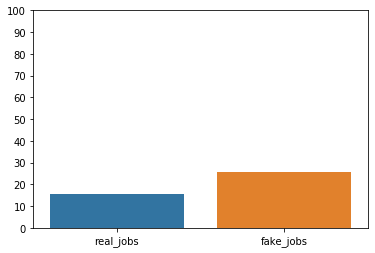

In [161]:
feature_extraction('has_salary_range', normalize = True)

# Feature: company_profile

Feature : has_company_profile  real jobs percentage: 84.01  fake jobs percentage: 32.22


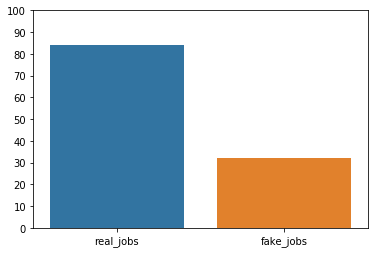

In [233]:
job_df['has_company_profile'] = job_df.company_profile.notnull().astype('int') 
feature_extraction('has_company_profile', normalize = True)

# Feature: description

# Feature: requirements

In [227]:
168.33
3.7

d = 168.33 * 2.75
l = 3.7
d/l

125.11013513513514

# Feature: benefits

# Feature: telecommuting

Feature : telecommuting  real jobs percentage: 4.13  fake jobs percentage: 7.39


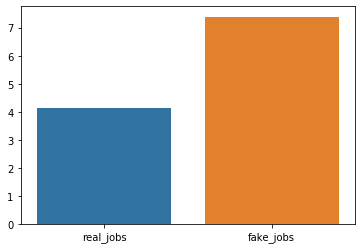

In [109]:
feature_extraction('telecommuting', normalize = False, binary = True)

# Feature: has_company_logo

Feature : has_company_logo  real jobs percentage: 81.91  fake jobs percentage: 32.68


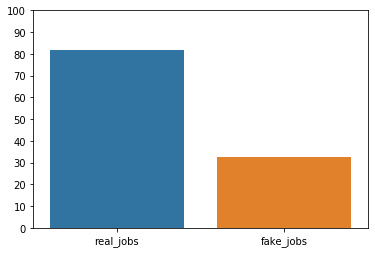

In [110]:
feature_extraction("has_company_logo", normalize = True, binary = True)

# Feature: has_questions

Feature : has_questions  real jobs percentage: 50.21  fake jobs percentage: 28.87


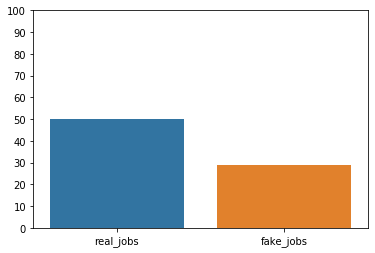

In [112]:
feature_extraction("has_questions", normalize = True, binary = True)

# Feature: employment_type 	

In [113]:
feature_table("employment_type")

           %_real_jobs  %_fake_jobs      diff
Full-time    65.416716    56.581986  8.834730
Part-time     4.249442     8.545035  4.295593
Contract      8.698719     5.080831  3.617887
Temporary     1.404726     0.230947  1.173779
Other         1.246033     1.732102  0.486069


In [117]:
job_df.fraudulent.groupby(job_df.employment_type.notnull()).sum()

employment_type
False    241
True     625
Name: fraudulent, dtype: int64

hhhh# Feature: required_experience

# Feature: required_education

In [124]:
feature_table("required_education")

                                   %_real_jobs  %_fake_jobs       diff
Bachelor's Degree                    29.652051    11.547344  18.104707
High School or equivalent            11.226049    19.630485   8.404436
Some High School Coursework           0.041143     2.309469   2.268326
Master's Degree                       2.262842     3.579677   1.316834
Certification                         0.887504     2.193995   1.306491
Associate Degree                      1.575173     0.692841   0.882333
Unspecified                           7.852357     7.043880   0.808477
Some College Coursework Completed     0.581874     0.346420   0.235453
Professional                          0.411426     0.461894   0.050468
Doctorate                             0.146938     0.115473   0.031464
Vocational                            0.287998          NaN        NaN
Vocational - HS Diploma               0.052898          NaN        NaN
Vocational - Degree                   0.035265          NaN        NaN


In [126]:
job_df.required_education.notnull().sum()

9775

In [129]:
job_df['has_education'] = job_df.required_education.notnull().astype('int') 

Feature : has_education  real jobs percentage: 55.01  fake jobs percentage: 47.92


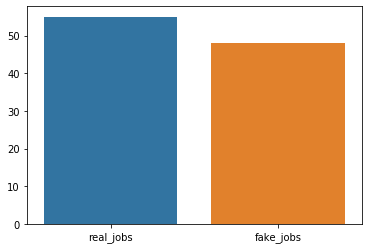

In [137]:
feature_extraction("has_education", normalize = False)

# Feature: industry

In [142]:
feature_table('industry')

                                      %_real_jobs  %_fake_jobs       diff
Oil & Energy                             1.046197    12.586605  11.540408
Computer Software                        8.058070     0.577367   7.480703
Information Technology and Services     10.003527     3.695150   6.308376
Accounting                               0.599506     6.581986   5.982480
Hospital & Health Care                   2.621371     5.889145   3.267775
Leisure, Travel & Tourism                0.323263     2.424942   2.101679
Real Estate                              0.887504     2.771363   1.883858
Computer Networking                      0.188080     1.385681   1.197601
Hospitality                              0.434936     1.616628   1.181692
Telecommunications                       1.857294     3.002309   1.145015
Health, Wellness and Fitness             0.658281     1.732102   1.073820
Consumer Services                        1.963089     2.771363   0.808273
Retail                                

# Feature: function

It is apparent that some of the columns are not relavent to our model so we can remove them.

In [6]:
pd.DataFrame(job_df.isnull().sum()).T

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,0,346,11547,15012,3308,1,2695,7210,0,0,0,3471,7050,8105,4903,6455,0


In [7]:
f_df = job_df[job_df.fraudulent == True]
r_df = job_df[job_df.fraudulent == False]

In [8]:
test_df = job_df[job_df.company_profile.notnull()]

In [25]:
def text_length(col):
    length = []
    for i in job_df[col]: 
        if i:    
            length.append(len(str(i)))            
        else: 
            length.append(0)
    return length    

In [33]:
job_df['has_company_profile'] = job_df['company_profile'].notnull().astype('int') 

In [36]:
job_df.fraudulent.groupby(job_df['has_company_profile']).sum()

has_company_profile
0    587
1    279
Name: fraudulent, dtype: int64

In [26]:
job_df['company_profile_len'] = text_length('company_profile')
job_df['requirements_len'] = text_length('requirements')
job_df['benefits_len'] = text_length('benefits')

Feature : benefits_len  real jobs: 221.9049884558875  fake jobs: 373.9498207885305


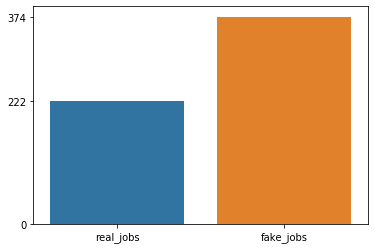

In [31]:
f_df = test_df[test_df.fraudulent == True]
r_df = test_df[test_df.fraudulent == False]

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def feature_extraction(column, normalize):
    real = r_df[column].mean() 
    fake = f_df[column].mean() 
    print(f'Feature : {column}  real jobs: {real}  fake jobs: {fake}')
    x =  pd.DataFrame({"real_jobs": real, "fake_jobs" : fake}, index = [0])
    sns.barplot(data = x, label = column)
    
    if normalize is True:
        plt.yticks([0,min(real, fake), max(real, fake)])
    
feature_extraction(column = "benefits_len", normalize= True)

Feature : company_profile  real jobs: 84.00728811566945  fake jobs: 32.21709006928407


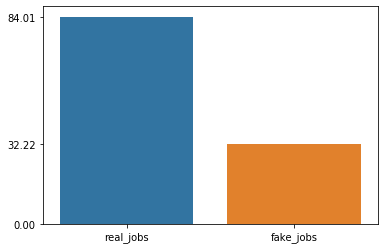

In [37]:
f_df = job_df[job_df.fraudulent == True]
r_df = job_df[job_df.fraudulent == False]

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def feature_extraction(column, normalize):
    real = (r_df[column].notnull().sum() / len(r_df)) * 100
    fake = (f_df[column].notnull().sum() / len(f_df)) * 100
    print(f'Feature : {column}  real jobs: {real}  fake jobs: {fake}')
    x =  pd.DataFrame({"real_jobs": real, "fake_jobs" : fake}, index = [0])
    sns.barplot(data = x, label = column)
    
    if normalize is True:
        plt.yticks([0,min(real, fake), max(real, fake)])
    
feature_extraction(column = "company_profile", normalize= True)

In [51]:
job_df.groupby(job_df['company_profile'].isnull()).mean()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,comp_prof_len
company_profile,,,,,,
False,8997.211502,0.036577,0.928767,0.528411,0.019146,761.852731
True,8690.681378,0.070738,0.207376,0.330109,0.177449,3.000000


<Figure size 432x288 with 0 Axes>

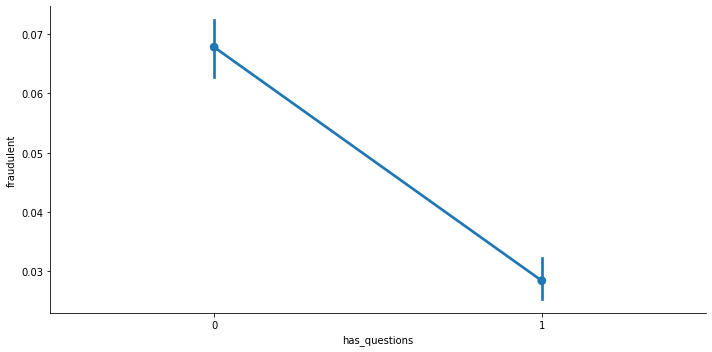

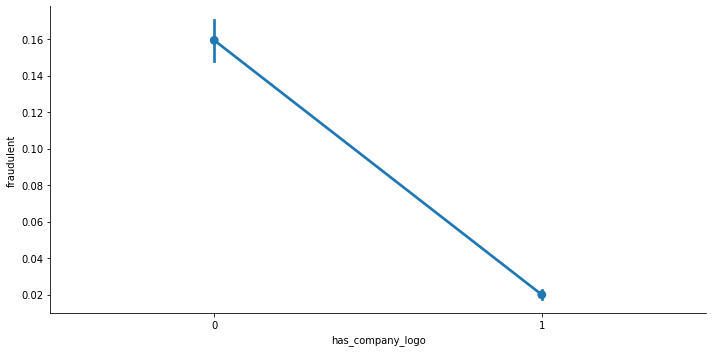

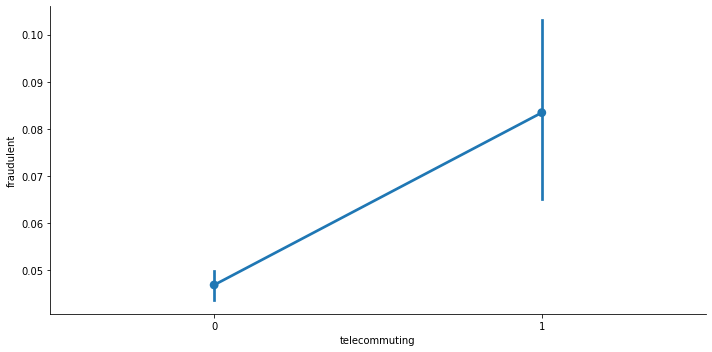

In [63]:
for i,col in enumerate(['has_questions', "has_company_logo", "telecommuting"]):
    plt.figure(i)
    sns.catplot(x=col, y= 'fraudulent', data= job_df, kind='point', aspect=2,)

Feature : comp_prof_len  real jobs: 641.2324556247796  fake jobs: 232.92494226327943


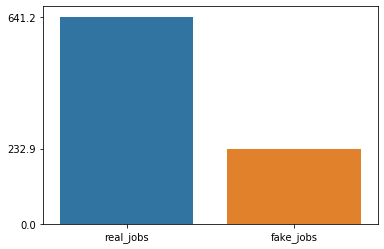

In [82]:
feature_extraction(column = "comp_prof_len", normalize= True)

In [80]:
job_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,comp_prof_len,description_len,requirements_len
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,Other,Internship,NaN,NaN,Marketing,0,885,905,852
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1286,2077,1433
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,879,355,1363
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,614,2600,1429
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1628,1520,757


In [138]:
df = job_df.dropna(axis = 0)

In [139]:
df.shape

(774, 21)

In [141]:
df.groupby(df.fraudulent).count()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,has_salary_range,has_educaion,has_education
fraudulent,,,,,,,,,,,,,,,,,,,,
0,702,702,702,702,702,702,702,702,702,702,702,702,702,702,702,702,702,702,702,702
1,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72


In [145]:
f_df = df[df.fraudulent == True]
r_df = df[df.fraudulent == False]

pd.options.display.max_seq_items = 4000
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

def feature_table1(column_name):
    r_func_df = pd.DataFrame(r_df[column_name].value_counts())
    r_func_df['%_real_jobs'] = (r_func_df[column_name] / len(r_df)) * 100
    r_func_df = r_func_df.drop(column_name, axis= 1)

    f_func_df = pd.DataFrame(f_df[column_name].value_counts())
    f_func_df['%_fake_jobs'] = (f_func_df[column_name] / len(f_df)) * 100
    f_func_df = f_func_df.drop(column_name, axis= 1)

    job_func_df = r_func_df.join(f_func_df)
    job_func_df['diff'] = abs(r_func_df['%_real_jobs'] - f_func_df['%_fake_jobs'] )
    print(job_func_df.sort_values(by= 'diff', ascending= False))
    
feature_table1("required_experience")

                  %_real_jobs  %_fake_jobs       diff
Entry level         21.652422    54.166667  32.514245
Associate           26.495726    18.055556   8.440171
Mid-Senior level    31.623932    26.388889   5.235043
Director             3.418803     1.388889   2.029915
Not Applicable      10.256410          NaN        NaN
Internship           3.703704          NaN        NaN
Executive            2.849003          NaN        NaN


In [147]:
feature_table1("employment_type")

           %_real_jobs  %_fake_jobs      diff
Part-time     1.851852     5.555556  3.703704
Contract      4.843305     1.388889  3.454416
Full-time    91.880342    93.055556  1.175214
Temporary     0.854701          NaN       NaN
Other         0.569801          NaN       NaN


In [151]:
feature_table1("department")

                                                    %_real_jobs  %_fake_jobs  \
Sales                                                 13.675214     4.166667   
Customer Service                                       2.564103    11.111111   
Engineering                                            8.119658     1.388889   
Customer Support                                       0.142450     1.388889   
customer service                                       0.284900     1.388889   
Administrative                                         0.427350     1.388889   
HR                                                     0.712251     1.388889   
Marketing                                              6.267806          NaN   
Oil and Gas                                            4.558405          NaN   
IT Services                                            3.276353          NaN   
Operations                                             2.564103          NaN   
Development                             